#### **Step 1. Follow along with the tutorial to gain an understanding of the process.**

**Importing Necessary Libraries**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt

#### **Step 2. In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset.**

In [ ]:
#Loading QMNIST dataset and preprocessing it
QMNIST_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
QMNIST_train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=QMNIST_transform)
QMNIST_test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=QMNIST_transform)

100%|██████████| 9704059/9704059 [00:00<00:00, 63999115.50it/s]


Extracting ./data/QMNIST/raw/qmnist-train-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 463024/463024 [00:00<00:00, 12500730.03it/s]

Extracting ./data/QMNIST/raw/qmnist-train-labels-idx2-int.gz to ./data/QMNIST/raw


100%|██████████| 9742279/9742279 [00:00<00:00, 65054678.78it/s]


Extracting ./data/QMNIST/raw/qmnist-test-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 526800/526800 [00:00<00:00, 11378161.66it/s]

Extracting ./data/QMNIST/raw/qmnist-test-labels-idx2-int.gz to ./data/QMNIST/raw


In [ ]:
#Creating Data Loaders
QMNIST_train_loader = DataLoader(QMNIST_train_dataset, batch_size=64, shuffle=True)
QMNIST_test_loader = DataLoader(QMNIST_test_dataset, batch_size=64, shuffle=False)

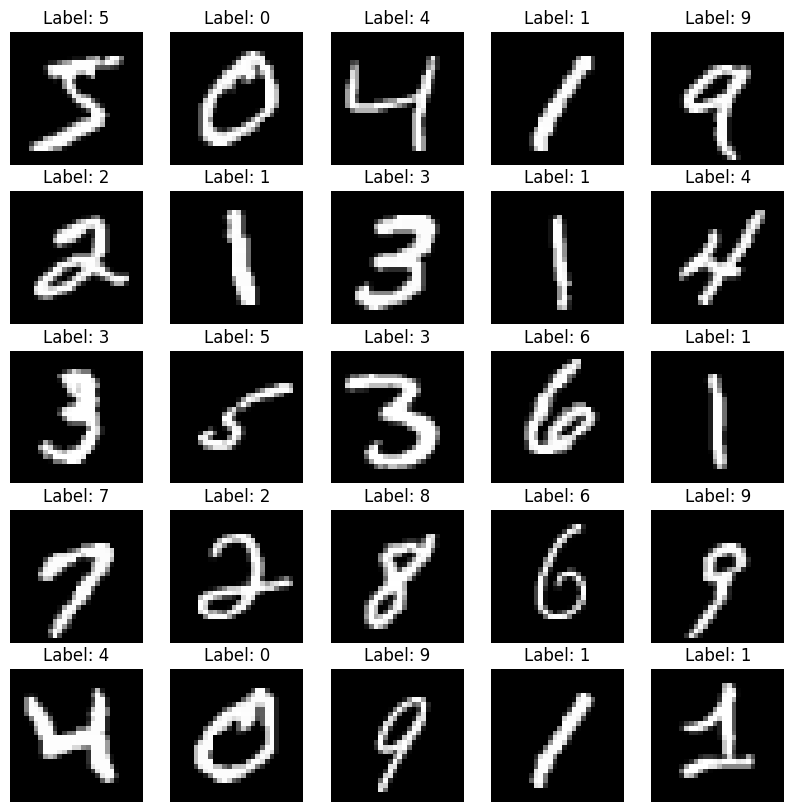

In [ ]:
#Vsualizing the QMNIST training dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(QMNIST_train_dataset[i][0].squeeze(), cmap='gray')
    plt.title(f'Label: {QMNIST_train_dataset[i][1]}')
    plt.axis('off')
plt.show()

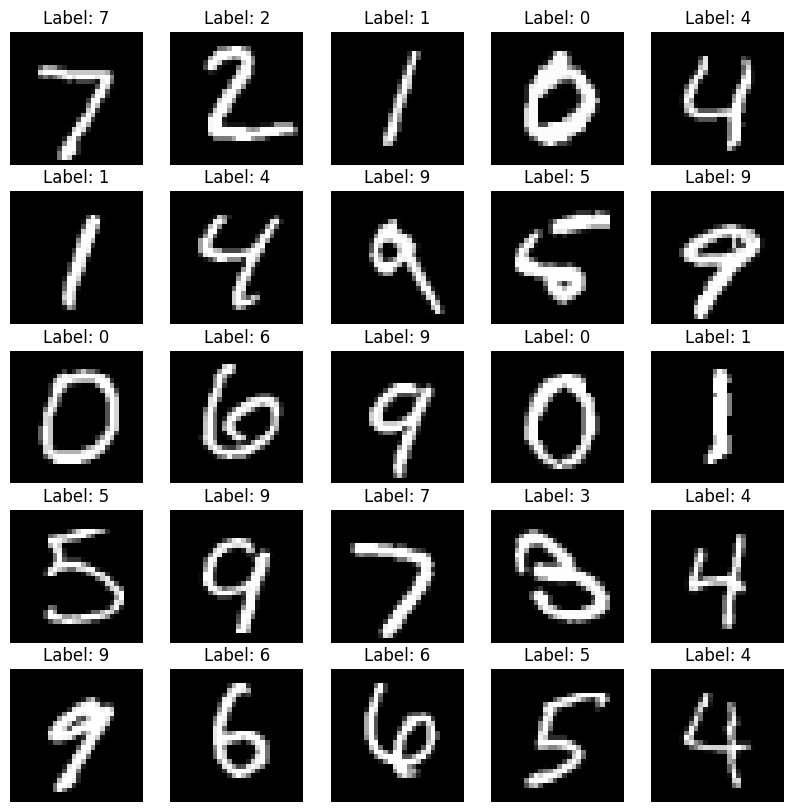

In [ ]:
#Visualizing the QMNIST test dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(QMNIST_test_dataset[i][0].squeeze(), cmap='gray')
    plt.title(f'Label: {QMNIST_test_dataset[i][1]}')
    plt.axis('off')
plt.show()

#### **Step 3. Report on the results in terms of prediction accuracy on the train and test datasets.**

* **Defining Neural Network Model**

In [ ]:

class QMNIST_MLP(nn.Module):
    def __init__(self):
        super(QMNIST_MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)


    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

* **Initializing the Neural Netwotk model**

In [ ]:
QMNIST_model = QMNIST_MLP()

* **Defining Loss Function as Cross Entropy and Optimizer as Adam**
* **Training the QMNIST neural Network**

In [ ]:
#Defining the loss function and optimizer
QMNIST_criterion = nn.CrossEntropyLoss()
QMNIST_optimizer = optim.Adam(QMNIST_model.parameters(), lr=0.001)

#Training the neural network
num_epochs = 5
for epoch in range(num_epochs):
    QMNIST_model.train()
    running_loss = 0.0
    total_train = 0
    correct_train = 0
    for i, data in enumerate(QMNIST_train_loader, 0):
        inputs, labels = data
        QMNIST_optimizer.zero_grad()
        outputs = QMNIST_model(inputs)
        loss = QMNIST_criterion(outputs, labels)
        loss.backward()
        QMNIST_optimizer.step()
        running_loss += loss.item()

        #Calculating the training dataset accuracy
        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

    # Calculate train accuracy
    train_accuracy = correct_train / total_train
    print(f'Epoch {epoch + 1}, Accuracy on Training Dataset: {train_accuracy}')

print('Finished QMNIST Training')

Epoch 1, Batch 100, Loss: 1.0390153348445892
Epoch 1, Batch 200, Loss: 0.4385501918196678
Epoch 1, Batch 300, Loss: 0.3972736456990242
Epoch 1, Batch 400, Loss: 0.35613451033830645
Epoch 1, Batch 500, Loss: 0.3314203626662493
Epoch 1, Batch 600, Loss: 0.31087343223392966
Epoch 1, Batch 700, Loss: 0.28889388471841815
Epoch 1, Batch 800, Loss: 0.2692469122260809
Epoch 1, Batch 900, Loss: 0.25445860106498003
Epoch 1, Accuracy on Training Dataset: 0.8799
Epoch 2, Batch 100, Loss: 0.20158951323479413
Epoch 2, Batch 200, Loss: 0.20427116695791483
Epoch 2, Batch 300, Loss: 0.19844556726515294
Epoch 2, Batch 400, Loss: 0.20524074032902717
Epoch 2, Batch 500, Loss: 0.18480144754052164
Epoch 2, Batch 600, Loss: 0.18319572370499373
Epoch 2, Batch 700, Loss: 0.18089312624186277
Epoch 2, Batch 800, Loss: 0.1691407470405102
Epoch 2, Batch 900, Loss: 0.19728902414441107
Epoch 2, Accuracy on Training Dataset: 0.9428666666666666
Epoch 3, Batch 100, Loss: 0.1428232116624713
Epoch 3, Batch 200, Loss: 0.1

* **Evaluating the Test Model**

In [ ]:
QMNIST_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in QMNIST_test_loader:
        images, labels = data
        outputs = QMNIST_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on testing dataset: { correct / total}%')

Accuracy on testing dataset: 0.96315%


The training runs through the dataset for 5 epochs, adjusting the model's parameters using the Adam optimizer and cross-entropy loss function. As it trains, the loss reduces gradually, indicating progress in learning. Also, the training accuracy steadily improves, reaching around 97.13% after 5 epochs and showing that the model can correctly classify images in the training set.

This increase in accuracy suggests that the model effectively learns from patterns within the dataset. In addition, with a testing accuracy of about 96.35%, it demonstrates how well this model generalizes to unseen data. The choice of hyperparameters—such as learning rate, optimizer selection, and model architecture (number of layers and neurons)—significantly impacts both training process and performance observed.

#### **Step 4-6**

**Choose one of the proposed modifications below:**

**Modify the model based on the chosen method and train**

**Report on the results of the modified model and if it matches your hypothesis**



* **Add another Dense layer of 128 nodes**

In [ ]:
class ModifiedMLP1(nn.Module):
    def __init__(self):
        super(ModifiedMLP1, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)  #Additional layer OF 128 NODES
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

#Initializing the modified neural network propsed modified model 1
modified_model1 = ModifiedMLP1()

#Defining the loss function and optimizer for modified model 1
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modified_model1.parameters(), lr=0.001)

#Training the modified neural network model 1
for epoch in range(num_epochs):
    modified_model1.train()
    running_loss = 0.0
    total_train = 0
    correct_train = 0
    for i, data in enumerate(QMNIST_train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = modified_model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

    # Calculate train accuracy
    train_accuracy = correct_train / total_train
    print(f'Epoch {epoch + 1}, Accuracy on Training dataset: {train_accuracy}')

print('Finished Training')

#Evaluating the modified model 1 on test set
modified_model1.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in QMNIST_test_loader:
        images, labels = data
        outputs = modified_model1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

modified_test_accuracy1 = correct / total
print(f'Accuracy on testing dataset (modified model - 1): {modified_test_accuracy1}')

Epoch 1, Batch 100, Loss: 1.0709230706095696
Epoch 1, Batch 200, Loss: 0.45688184842467305
Epoch 1, Batch 300, Loss: 0.39139827966690066
Epoch 1, Batch 400, Loss: 0.36909933358430863
Epoch 1, Batch 500, Loss: 0.32774952441453936
Epoch 1, Batch 600, Loss: 0.29199860885739326
Epoch 1, Batch 700, Loss: 0.25970675244927405
Epoch 1, Batch 800, Loss: 0.24575468681752682
Epoch 1, Batch 900, Loss: 0.2565399082750082
Epoch 1, Accuracy on Training dataset: 0.8769166666666667
Epoch 2, Batch 100, Loss: 0.20534313034266233
Epoch 2, Batch 200, Loss: 0.20424206618219615
Epoch 2, Batch 300, Loss: 0.196120393499732
Epoch 2, Batch 400, Loss: 0.17911764908581973
Epoch 2, Batch 500, Loss: 0.1814156737178564
Epoch 2, Batch 600, Loss: 0.16747272823005915
Epoch 2, Batch 700, Loss: 0.16155398117378353
Epoch 2, Batch 800, Loss: 0.16729812886565923
Epoch 2, Batch 900, Loss: 0.16612053219228984
Epoch 2, Accuracy on Training dataset: 0.9445833333333333
Epoch 3, Batch 100, Loss: 0.13589018022641539
Epoch 3, Batch 

The modification of adding an extra dense layer of 128 nodes to the original MLP model has resulted in improved performance. After training for 5 epochs, the modified model achieved an impressive training accuracy of approximately 97.02%. The additional layer allows for more complex representations to be learned, enhancing the model's ability to capture intricate patterns in the data. Consequently, the testing accuracy also saw an increase, reaching around 96.59%, indicating that the model's generalization capacity has been enhanced. S, the modification has led to better performance on both the training and testing datasets, demonstrating the effectiveness of the enhancement.

* **Increase the current number of nodes in the layer to 256**

In [ ]:
class ModifiedMLP2(nn.Module):
    def __init__(self):
        super(ModifiedMLP2, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)  #Increased nodes in the layer to 256
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#Initializing the modified neural network model 2
modified_model2 = ModifiedMLP2()

#Defining the loss function and optimizer for modified model 2
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modified_model2.parameters(), lr=0.001)

#Training the modified neural network model 2
for epoch in range(num_epochs):
    modified_model2.train()
    running_loss = 0.0
    total_train = 0
    correct_train = 0
    for i, data in enumerate(QMNIST_train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = modified_model2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

    # Calculate train accuracy
    train_accuracy = correct_train / total_train
    print(f'Epoch {epoch + 1}, Accuracy on Training dataset: {train_accuracy}')


print('Finished Training')

#Evaluating the modified model 2 on test set
modified_model2.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in QMNIST_test_loader:
        images, labels = data
        outputs = modified_model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

modified_test_accuracy2 = correct / total
print(f'Accuracy on testing dataset (modified model - 2): {modified_test_accuracy2}')

Epoch 1, Batch 100, Loss: 0.9010415947437287
Epoch 1, Batch 200, Loss: 0.3955633771419525
Epoch 1, Batch 300, Loss: 0.36391509786248205
Epoch 1, Batch 400, Loss: 0.319299680814147
Epoch 1, Batch 500, Loss: 0.297669121325016
Epoch 1, Batch 600, Loss: 0.24732958257198334
Epoch 1, Batch 700, Loss: 0.2510384574532509
Epoch 1, Batch 800, Loss: 0.2356664188206196
Epoch 1, Batch 900, Loss: 0.22380957923829556
Epoch 1, Accuracy on Training dataset: 0.8940666666666667
Epoch 2, Batch 100, Loss: 0.1768389517441392
Epoch 2, Batch 200, Loss: 0.18253634180873632
Epoch 2, Batch 300, Loss: 0.17071201883256434
Epoch 2, Batch 400, Loss: 0.16457284953445195
Epoch 2, Batch 500, Loss: 0.15170896846801044
Epoch 2, Batch 600, Loss: 0.1544948105700314
Epoch 2, Batch 700, Loss: 0.14764259301126004
Epoch 2, Batch 800, Loss: 0.14175523953512312
Epoch 2, Batch 900, Loss: 0.15761282008141278
Epoch 2, Accuracy on Training dataset: 0.9509
Epoch 3, Batch 100, Loss: 0.10786966759711504
Epoch 3, Batch 200, Loss: 0.1150

Increasing the hidden layer's node count to 256 in the adjusted MLP model has shown promising results. After training for 5 epochs, the model achieved a training accuracy of about 97.41%, indicating its ability to capture complex patterns in the data due to the increased complexity offered by the larger layer. As a result, testing accuracy also improved, reaching approximately 96.66%, demonstrating an enhanced generalization capacity for the model. Overall, this modification has resulted in improved performance on both training and testing datasets, underscoring the effectiveness of increasing the layer's node count.

#### **Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.**

* **Hypothesis-1**

 * 3 fully connected layers with LogSoftmax activation function between them.

 * Dropout rate of 0.3 applied after the first fully connected layer

 * Negative Log Likelihood Loss (NLLLoss) used as the loss function

 * Stochastic Gradient Descent (SGD) optimizer with epochs as 10

In [ ]:
# Define the neural network architecture hypothesis 1
class Hypothesis1Model(nn.Module):
    def __init__(self):
        super(Hypothesis1Model, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

# Initialize the hypothesis hypothesis 1
model = Hypothesis1Model()

# Define the loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)


# Train the hypothesis_1 model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_train = 0
    correct_train = 0
    for i, data in enumerate(QMNIST_train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

    # Calculate train accuracy
    train_accuracy = correct_train / total_train
    print(f'Epoch {epoch + 1}, Accuracy on Training dataset: {train_accuracy}')

print('Finished Training')

# Evaluate the hypothesis 1 model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in QMNIST_test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on testing dataset: {correct / total}')

Epoch 1, Batch 100, Loss: 2.2964222383499147
Epoch 1, Batch 200, Loss: 2.282272663116455
Epoch 1, Batch 300, Loss: 2.2665941452980043
Epoch 1, Batch 400, Loss: 2.257044305801392
Epoch 1, Batch 500, Loss: 2.243859798908234
Epoch 1, Batch 600, Loss: 2.232000586986542
Epoch 1, Batch 700, Loss: 2.21800567150116
Epoch 1, Batch 800, Loss: 2.2060617351531984
Epoch 1, Batch 900, Loss: 2.191219172477722
Epoch 1, Accuracy on Training dataset: 0.23978333333333332
Epoch 2, Batch 100, Loss: 2.165939347743988
Epoch 2, Batch 200, Loss: 2.1403634357452392
Epoch 2, Batch 300, Loss: 2.1234990620613097
Epoch 2, Batch 400, Loss: 2.099569869041443
Epoch 2, Batch 500, Loss: 2.074424855709076
Epoch 2, Batch 600, Loss: 2.0487805247306823
Epoch 2, Batch 700, Loss: 2.0220170056819917
Epoch 2, Batch 800, Loss: 1.9842404901981354
Epoch 2, Batch 900, Loss: 1.94229061126709
Epoch 2, Accuracy on Training dataset: 0.48275
Epoch 3, Batch 100, Loss: 1.9023265469074249
Epoch 3, Batch 200, Loss: 1.8467917919158936
Epoch 

The first hypothesis model includes three connected layers with LogSoftmax activation functions. A dropout rate of 0.3 is used after the initial fully connected layer to avoid overfitting. The NLLLoss function acts as the loss function, while SGD is utilized as the optimizer with a learning rate of 0.001. Training for 10 epochs was carried out on this model.

A lower learning rate tends to result in slower but more stable training. With a learning rate of 0.001, the model's loss gradually decreases over epochs, indicating a smooth convergence.
The choice of optimizer is impacting how the model updates its parameters during training.

The model reached a training accuracy of about 83.47% after the 10th epoch, and the loss decreased consistently as the training went on, showing that the model was effectively learning from the dataset. Upon evaluation on the testing dataset, the model achieved an accuracy of about 87.39%, demonstrating its ability to generalize well to unseen data.

* **Hypothesis-2**

 * 4 fully connected layers with sigmoid activation function between them
 * Dropout rate of 0.7 applied after the first and third fully connected layers
 * Binary Cross Entropy with Logits Loss (BCEWithLogitsLoss) used as the loss function and Adagrad as Optimizer
 * Adagrad optimizer with learning rate as 0.01 and with 15 epochs

In [ ]:
# Define the neural network architecture hypothesis model 2
class Hypothesis2Model(nn.Module):
    def __init__(self):
        super(Hypothesis2Model, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.7)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.sigmoid(self.fc1(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x


# Initialize the hypothesis model 2
hypothesis_model_2 = Hypothesis2Model()

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adagrad(hypothesis_model_2.parameters(), lr=0.01)

# Train the hypothesis model 2
num_epochs = 15
for epoch in range(num_epochs):
    hypothesis_model_2.train()
    running_loss = 0.0
    total_train = 0
    correct_train = 0
    for i, data in enumerate(QMNIST_train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = hypothesis_model_2(inputs)

        # One-hot encode the labels
        labels_onehot = torch.zeros_like(outputs)
        labels_onehot.scatter_(1, labels.view(-1, 1), 1.0)

        loss = criterion(outputs, labels_onehot)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate training accuracy
        predicted_train = outputs > 0.5
        total_train += labels.size(0)
        correct_train += (predicted_train == labels_onehot).sum().item()

        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

    # Calculate train accuracy
    train_accuracy = correct_train / total_train
    print(f'Epoch {epoch + 1}, Accuracy on Training dataset: {train_accuracy}')

print('Finished Training')

# Evaluate the hypothesis model 2
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in QMNIST_test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on testing dataset: {correct / total}')

Epoch 1, Batch 100, Loss: 0.36641561925411226
Epoch 1, Batch 200, Loss: 0.34051380068063736
Epoch 1, Batch 300, Loss: 0.3176856505870819
Epoch 1, Batch 400, Loss: 0.29351087152957916
Epoch 1, Batch 500, Loss: 0.2736477580666542
Epoch 1, Batch 600, Loss: 0.2595393231511116
Epoch 1, Batch 700, Loss: 0.24746610566973687
Epoch 1, Batch 800, Loss: 0.24029458537697793
Epoch 1, Batch 900, Loss: 0.22627809807658195
Epoch 1, Accuracy on Training dataset: 9.004166666666666
Epoch 2, Batch 100, Loss: 0.21672579184174537
Epoch 2, Batch 200, Loss: 0.20815501004457473
Epoch 2, Batch 300, Loss: 0.2009918373823166
Epoch 2, Batch 400, Loss: 0.19611442640423773
Epoch 2, Batch 500, Loss: 0.19028647765517234
Epoch 2, Batch 600, Loss: 0.18718621924519538
Epoch 2, Batch 700, Loss: 0.1828821773827076
Epoch 2, Batch 800, Loss: 0.17903639540076255
Epoch 2, Batch 900, Loss: 0.17738087669014932
Epoch 2, Accuracy on Training dataset: 9.116666666666667
Epoch 3, Batch 100, Loss: 0.17292431384325027
Epoch 3, Batch 20

The second hypothesis model consists of four fully linked layers with sigmoid activation functions. Binary Cross Entropy with Logits Loss is used as the loss function, and Adagrad as optimizer with a learning rate of 0.01 for training the model for 15 epochs with dropout rate as 0.7.

During the training, the model shows an unusual pattern where the training accuracy stays consistently low at about 9.65%. This indicates that the model might not be effectively learning from the training data. The dropout rate of 0.7 is meant to prevent overfitting but it's too high and seems to be preventing the model from learning meaningful patterns from the data during training. The loss values seem quite high, suggesting that the model is having a tough time converging. When we look at the test dataset, the model achieves an accuracy of approximately 87.39%, matching hypothesis-1's accuracy.

* **Hypothesis-3**

 * Model architecture is more complex with 4 fully connected layers and more neurons

 * Dropout rate of 0.5 is applied after the first fully connected layer

 * Adam optimizer is used with a learning rate of 0.0000001 and epochs of 20

 * reLU as activation function and crossentropy as loss function

In [ ]:
# Define the neural network architecture hypothesis model 3
class Hypothesis3Model(nn.Module):
    def __init__(self):
        super(Hypothesis3Model, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Initialize the hypothesis model 3
hypothesis_model_3 = Hypothesis3Model()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(hypothesis_model_3.parameters(), lr=0.0000001)

# Train the hypothesis model 3
num_epochs = 20
for epoch in range(num_epochs):
    hypothesis_model_3.train()
    running_loss = 0.0
    total_train = 0
    correct_train = 0
    for i, data in enumerate(QMNIST_train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = hypothesis_model_3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted_train = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

    # Calculate train accuracy
    train_accuracy = correct_train / total_train
    print(f'Epoch {epoch + 1}, Accuracy on Training dataset: {train_accuracy}')

print('Finished Training')

# Evaluate the hypothesis model 3
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in QMNIST_test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on testing dataset: {correct / total}')

Epoch 1, Batch 100, Loss: 2.3047374367713926
Epoch 1, Batch 200, Loss: 2.3050670051574706
Epoch 1, Batch 300, Loss: 2.305504801273346
Epoch 1, Batch 400, Loss: 2.3029680943489073
Epoch 1, Batch 500, Loss: 2.3050238037109376
Epoch 1, Batch 600, Loss: 2.3046005058288572
Epoch 1, Batch 700, Loss: 2.305506777763367
Epoch 1, Batch 800, Loss: 2.3045759534835817
Epoch 1, Batch 900, Loss: 2.3043960237503054
Epoch 1, Accuracy on Training dataset: 0.0915
Epoch 2, Batch 100, Loss: 2.3044574570655825
Epoch 2, Batch 200, Loss: 2.3034186005592345
Epoch 2, Batch 300, Loss: 2.3053583884239197
Epoch 2, Batch 400, Loss: 2.304675464630127
Epoch 2, Batch 500, Loss: 2.304005265235901
Epoch 2, Batch 600, Loss: 2.3041434144973754
Epoch 2, Batch 700, Loss: 2.304326207637787
Epoch 2, Batch 800, Loss: 2.3047228980064394
Epoch 2, Batch 900, Loss: 2.303987929821014
Epoch 2, Accuracy on Training dataset: 0.09233333333333334
Epoch 3, Batch 100, Loss: 2.303482940196991
Epoch 3, Batch 200, Loss: 2.305009686946869
Epo

The third hypothesis model has a more intricate structure, featuring four fully connected layers with an increasing number of neurons in each. To prevent overfitting, a dropout rate of 0.5 is applied after the first fully connected layer. Between the layers, the ReLU activation function is used and Cross Entropy Loss serves as the loss function. The model is optimized using the Adam optimizer with a very low learning rate of 0.0000001 and undergoes training for 20 epochs.

During the training, the model shows poor accuracy on the training dataset, only reaching about 11.57% at the end of the process. The high loss values suggest that the model may not be effectively learning from the training data. Upon evaluation on the testing dataset, the model attains an accuracy of around 87.39%, similar to hypothesis-1 and hypothesis-2. This indicates that despite a lower training accuracy, the model might still generalize effectively to new data.


* **Hypothesis-4**
 * complex with 5 fully connected layers and more neurons with reLU as activation function function

 * Mean Square Error(MSE) as loss function

 * SGD as optimizer with 15 epochs

In [ ]:
# Define the neural network architecture hypothesis model 4
class Hypothesis4Model(nn.Module):
    def __init__(self):
        super(Hypothesis4Model, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x


# Initialize the hypothesis model 4
hypothesis_model_4 = Hypothesis4Model()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(hypothesis_model_4.parameters(), lr=0.01)

# Train the hypothesis model 4
num_epochs = 15
for epoch in range(num_epochs):
    hypothesis_model_4.train()
    running_loss = 0.0
    total_train = 0
    correct_train = 0
    for i, data in enumerate(QMNIST_train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = hypothesis_model_4(inputs)

        # One-hot encode the labels
        labels_onehot = torch.zeros_like(outputs)
        labels_onehot.scatter_(1, labels.view(-1, 1), 1.0)
        loss = criterion(outputs, labels_onehot)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted_train = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

    # Calculate train accuracy
    train_accuracy = correct_train / total_train
    print(f'Epoch {epoch + 1}, Accuracy on Training dataset: {train_accuracy}')

print('Finished Training')

# Evaluate the hypothesis model 4
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in QMNIST_test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on testing dataset: {correct / total}')

Epoch 1, Batch 100, Loss: 0.09622630037367344
Epoch 1, Batch 200, Loss: 0.09329525232315064
Epoch 1, Batch 300, Loss: 0.09204119883477688
Epoch 1, Batch 400, Loss: 0.0910411536693573
Epoch 1, Batch 500, Loss: 0.09057243958115578
Epoch 1, Batch 600, Loss: 0.09019419677555561
Epoch 1, Batch 700, Loss: 0.08992717050015926
Epoch 1, Batch 800, Loss: 0.08992855370044708
Epoch 1, Batch 900, Loss: 0.08970348998904228
Epoch 1, Accuracy on Training dataset: 0.11476666666666667
Epoch 2, Batch 100, Loss: 0.08944518081843852
Epoch 2, Batch 200, Loss: 0.08955859780311584
Epoch 2, Batch 300, Loss: 0.08932636231184006
Epoch 2, Batch 400, Loss: 0.08939350008964539
Epoch 2, Batch 500, Loss: 0.0892482853680849
Epoch 2, Batch 600, Loss: 0.08899448722600938
Epoch 2, Batch 700, Loss: 0.08895489685237408
Epoch 2, Batch 800, Loss: 0.08879904322326183
Epoch 2, Batch 900, Loss: 0.08877838477492332
Epoch 2, Accuracy on Training dataset: 0.17073333333333332
Epoch 3, Batch 100, Loss: 0.08863696537911891
Epoch 3, B

The hypothesis-4 model consists of five fully connected layers, with a gradual decrease in the number of neurons and ReLU activation functions applied between them. A dropout rate of 0.5 is used after the first and third fully connected layers for regularization. The model employs Mean Square Error as the loss function, and it is optimized using SGD with a learning rate set to 0.01. The training process involves 15 epochs.

Throughout the training, the model's accuracy gradually improves on the training dataset, reaching about 65.51% at the end of the process. The loss values consistently decrease as the training goes on, showing that the model is effectively learning and optimizing its parameters. Upon testing with the dataset, the model shows an accuracy of about 87.39%, matching other hypotheses. This indicates that the model is performing well on new data, even though it was trained using a different loss function and optimizer.

### **GitHub Link**

https://github.com/ManishaLagisetty/Deep_Learning_DATA255